# [**시계열 알고리즘 종류**](https://paperswithcode.com/area/time-series)

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Time-Series-Analysis/blob/main/Lecture3-7_StatisticalLearning_TimeSeries_LinearMultivariate_KK.ipynb)

---

> **"통계추론, 기계학습 및 딥러닝의 흐름에 `시간패턴`을 반영하려 진화"**
>
> **"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 
>
> **"`미래 예측을 포함한 추천 서비스와 같은 비즈니스`에 활용중"** 

<center><img src='Image/Expert/TS_Evolution.png' width='900'></center>

<!-- <center><img src='Image/Expert/Performance_Explanability_TimeSeries.png' width='600'></center> -->

**1) 통계추론(Statistical Inference) 알고리즘:** `통계분포`에 기반한 `설명력 중시 알고리즘`

<center><img src='Image/Expert/TS_Algorithm_Concept.png' width='700'></center> 

> **(1) 단변량 선형기반:** `Y가 1개` & `Y와 X의 관계를 선형 가정`
>
> - Linear Regression
> - `ARIMA(AutoRegressive Integrated Moving Average)`
> - `ARIMAX`
> - `SARIMAX`
>
> **(2) 다변량 선형기반:** `Y가 2개 이상` & `Y와 X의 관계를 선형 가정`
>
> - Bayesian-based Models
> - [`Vector Autoregression(VAR)`](https://en.wikipedia.org/wiki/Vector_autoregression)
> - `Vector Error Correction Model(VECM)`
>
> **(3) 비선형기반:** `Y와 X의 관계를 비선형 가정`
>
> - `Exponential Smoothing`
> - `ETS(Error/Trend/Seasonal)`
> - `Kalman Filter`
> - State Space Model
> - Change Point Detection(CPD)
> - `Autoregressive conditional heteroskedasticity(ARCH)`
> - [`Generalized Autoregressive Conditional Heteroskedasticity(GARCH)`](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)

**2) 기계학습/딥러닝 알고리즘:** `컴퓨팅` 기반 `인공지능 알고리즘`으로 `정확성 높은 비선형 관계` 추론

> - `Prophet`
> - `Neural Prophet`
> - `RNN(Recurrent Neural Network)`
> - `LSTM(Long Short-Term Memory)`
> - `GRU(Gated Recurrent Unit)`
> - Neural Networks Autoregression(NNAR)
> - Attention
> - Self-attention
> - Transformer

**3) Platforms:** 글로벌 기업들이 독자적으로 개발한 `시계열 분석 플랫폼` 확대중

> - [Amazon Forecast](https://aws.amazon.com/ko/forecast/)
> - [Automated ML Time-series Forecasting at Microsoft Azure](https://azure.microsoft.com/en-us/blog/build-more-accurate-forecasts-with-new-capabilities-in-automated-machine-learning/)
> - [Time Series Forecasting with Google Cloud AI Platform](https://codelabs.developers.google.com/codelabs/time-series-forecasting-with-cloud-ai-platform#0)


In [1]:
!pip install --user pmdarima

In [2]:
# Auto reload and user defined functions
%reload_ext autoreload
%autoreload 2
from module_regression import *
from module_classification import *
from module_timeseries import *

# Time series algorithms
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import AutoARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.vector_ar.var_model import VARProcess, VAR
from statsmodels.tsa.vector_ar.util import varsim
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint

# **다변량 선형과정 알고리즘(Multivariate Linear Process)**

- **배경:**

> **"`과거`에는 주로 `단변량(Univariate)`의 시계열 데이터 `분석과 예측` 문제가 메인
`최근`에는 실시간으로 시차를 두고 상호 상관관계가 다양하게 이루어 지면서, `다변량(Multivariate)`의 시계열 데이터를 다뤄야 하는 경우가 `많아지고 있음`"**
>
> - `어떤 상품의 수요`($Y_{1,t}$)가 `다른 상품들의 수요`($Y_{2,t}, Y_{3,t}, ...$) 변화에 영향을 받거나
> - 어떤 지역의 `택시 수요`($Y_{1,t}$)가 `다른 지역의 택시 수요`($Y_{2,t-2}, Y_{3,t-1}, ...$)와 `일정한 시간 차이`을 두고 상관 관계를 보일 수 있음
> - 디지털시대에 접어들며, 변수가 적게는 `수백에서 많게는 수백만`에 이를만큼 `서로 상호작용이 다양`해지고 있고, 이를 효율적으로 처리 및 학습할 수 있는 알고리즘이 매우 중요

---

- **필요성:**

> - 시간패턴을 반영하려는 `기계학습과 딥러닝` 알고리즘은 쉽게 `다변량 예측으로 확장`되어 활용
> - 단변량(Simple/Multiple) 시계열은 종속변수($Y_t$)가 `독립변수들에만! 영향을 받는다는 큰 가정` 존재
> - `현실`적으론 `종속변수와 독립변수는 상호 영향`을 주고받지 한쪽만 받는관계 아님
>
>> - **예시:** 개인 소득과 지출 중 어떤게 `Y로 적합한가?`라는 질문은 왜 하지 않는가?
>> - **예시:** 매출과 비용? 자전거수요와 날씨? 중 어떤게 `Y로 적합한가?`라는 질문은 왜 하지 않는가?
>> - **예시:** 미국과 한국 주식시장 중 어떤게 `Y로 적합한가?`라는 질문은 왜 하지 않는가?
>
> **"2차원(소득과 지출 모두를 종속변수) 과거1시점까지만을 고려하는 `백터자기회귀 알고리즘`"**
>
>\begin{align*}
\text{Equation of VAR(1)} && Y_{[t]} &= A Y_{[t-1]} + \epsilon_{[t]} \\
\text{where} && Y_{[t]} &= \begin{bmatrix} Y_{1t} \\ Y_{2t} \end{bmatrix},
A = \begin{bmatrix} \phi_{11} \phi_{12} \\ \phi_{21} \phi_{22} \end{bmatrix},
Y_{[t-1]} = \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \end{bmatrix}, \\
&& \epsilon_{[t]} &= \begin{bmatrix} e_{1t} \\ e_{2t} \end{bmatrix} \sim N(0, \textstyle \sum_{\epsilon_{[t]}}) \\
\text{Each Equation of VAR(1)} && Y_{1t} &= \phi_{11} Y_{1t-1} + \phi_{12} Y_{2t-1} + e_{1t} \\
&& Y_{2t} &= \phi_{21} Y_{1t-1} + \phi_{22} Y_{2t-1} + e_{2t} \\
\end{align*}

## 벡터자기회귀 모형(Vector Autoregressive)

**1) VAR 알고리즘:** 단변량 시계열과 각각의 데이터가 `정상성(Stationary)`을 만족하는 경우 적용 가능

\begin{align*}
\text{Generalized Equation of VAR(1)} && Y_{[t]} &= A_1 Y_{[t-1]} + e_t \\
\text{where} && Y_{[t]} &= \begin{bmatrix} Y_{1t} \\ Y_{2t} \\ \vdots \\ Y_{kt} \end{bmatrix},
A_1 = \begin{bmatrix} \phi_{11}^1 \phi_{12}^1 \cdots \phi_{1k}^1 \\ \phi_{21}^1 \phi_{22}^1 \cdots \phi_{2k}^1 \\ \vdots \\ \phi_{k1}^1 \phi_{k2}^1 \cdots \phi_{kk}^1 \end{bmatrix},
Y_{[t-1]} = \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \\ \vdots \\ Y_{kt-1} \end{bmatrix}, \\
&& \epsilon_{[t]} &= \begin{bmatrix} e_{1t} \\ e_{2t} \\ \vdots \\ e_{kt} \end{bmatrix} \sim N(0, \textstyle \sum_{\epsilon_{[t]}}) \\
\text{Each Equations} && Y_{1t} &= \phi_{11}^1 Y_{1t-1} + \phi_{12}^1 Y_{2t-1} + \cdots + \phi_{1k}^1 Y_{kt-1} + e_{1t} \\
&& Y_{2t} &= \phi_{21}^1 Y_{1t-1} + \phi_{22}^1 Y_{2t-1} + \cdots + \phi_{2k}^1 Y_{kt-1} + e_{2t} \\
&& & \vdots \\
&& Y_{kt} &= \phi_{k1}^1 Y_{1t-1} + \phi_{k2}^1 Y_{2t-1} + \cdots + \phi_{kk}^1 Y_{kt-1} + e_{kt} \\
\end{align*}


\begin{align*}
\text{Generalized Equation of VAR(2)} && Y_{[t]} &= A_1 Y_{[t-1]} + A_2 Y_{[t-2]} + e_t \\
\text{where} && Y_{[t]} &= \begin{bmatrix} Y_{1t} \\ Y_{2t} \\ \vdots \\ Y_{kt} \end{bmatrix},
A_1 = \begin{bmatrix} \phi_{11}^1 \phi_{12}^1 \cdots \phi_{1k}^1 \\ \phi_{21}^1 \phi_{22}^1 \cdots \phi_{2k}^1 \\ \vdots \\ \phi_{k1}^1 \phi_{k2}^1 \cdots \phi_{kk}^1 \end{bmatrix},
Y_{[t-1]} = \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \\ \vdots \\ Y_{kt-1} \end{bmatrix}, \\
&& A_2 &= \begin{bmatrix} \phi_{11}^2 \phi_{12}^2 \cdots \phi_{1k}^2 \\ \phi_{21}^2 \phi_{22}^2 \cdots \phi_{2k}^2 \\ \vdots \\ \phi_{k1}^2 \phi_{k2}^2 \cdots \phi_{kk}^2 \end{bmatrix},
Y_{[t-2]} = \begin{bmatrix} Y_{1t-2} \\ Y_{2t-2} \\ \vdots \\ Y_{kt-2} \end{bmatrix}, \\
&& \epsilon_{[t]} &= \begin{bmatrix} e_{1t} \\ e_{2t} \\ \vdots \\ e_{kt} \end{bmatrix} \sim N(0, \textstyle \sum_{\epsilon_{[t]}}) \\
\text{Each Equations} && Y_{1t} &= \phi_{11}^1 Y_{1t-1} + \phi_{12}^1 Y_{2t-1} + \cdots + \phi_{1k}^2 Y_{kt-1} + \phi_{11}^2 Y_{1t-2} + \phi_{12}^2 Y_{2t-2} + \cdots + \phi_{1k}^2 Y_{kt-2} + e_{1t} \\
&& Y_{2t} &= \phi_{21}^1 Y_{1t-1} + \phi_{22}^1 Y_{2t-1} + \cdots + \phi_{2k}^1 Y_{kt-1} + \phi_{21}^2 Y_{1t-2} + \phi_{22}^2 Y_{2t-2} + \cdots + \phi_{2k}^2 Y_{kt-2} + e_{2t} \\
&& & \vdots \\
&& Y_{kt} &= \phi_{k1}^1 Y_{1t-1} + \phi_{k2}^1 Y_{2t-1} + \cdots + \phi_{kk}^1 Y_{kt-1} + \phi_{k1}^2 Y_{1t-2} + \phi_{k2}^2 Y_{2t-2} + \cdots + \phi_{kk}^2 Y_{kt-2} + e_{kt} \\
\end{align*}

---

\begin{align*}
\text{Generalized Equation of VAR(p)} && Y_{[t]} &= A_1 Y_{[t-1]} + A_2 Y_{[t-2]} + \cdots + A_p Y_{[t-p]} + \epsilon_{[t]} \\
\text{Mean} && \mu_{[t]} &= \text{E}(Y_{[t]})
= \begin{bmatrix} \text{E}(Y_{1t}) \\ \text{E}(Y_{2t}) \\ \vdots \\ \text{E}(Y_{kt}) \end{bmatrix}
= \begin{bmatrix} \mu_{1} \\ \mu_{2}\\ \vdots \\ \mu_{k} \end{bmatrix} \\
\text{Covariance} && \Gamma(l) &= \text{E}[(Y_{[t]} − \mu_{[t]})(Y_{[t]} − \mu_{[t]})^T ] \\
&& &= \begin{bmatrix}
\text{E}[(Y_{1t} − \mu_1)^2] & \text{E}[(Y_{1t} − \mu_1)(Y_{2t} − \mu_2)] & \cdots & \text{E}[(Y_{1t} − \mu_1)(Y_{kt} − \mu_k)] \\
\text{E}[(Y_{2t} − \mu_2)(Y_{1t} − \mu_1)] & \text{E}[(Y_{2t} − \mu_2)^2] & \cdots & \text{E}[(Y_{2t} − \mu_2)(Y_{kt} − \mu_k)] \\
\vdots & \vdots & \ddots & \vdots \\
\text{E}[(Y_{kt} − \mu_k)(Y_{1t} − \mu_1)]& \text{E}[(Y_{kt} − \mu_k)(Y_{2t} − \mu_2)] & \cdots  & \text{E}[(Y_{kt} − \mu_k)^2]  \\
\end{bmatrix} \\
\text{Covariance Diagonal} && D &= \text{diag}(\sqrt{\Gamma_{11}}, \cdots, \sqrt{\Gamma_{kk}}) \\
\text{Cross-correlation Matrix} && \rho(l) &= D^{−1}\Gamma(l)D^{−1} \\
\end{align*}

---

**2) 임펄스 응답 함수(Impulse Response Function):**

> **"VAR 모형은 여러개의 `시계열 상호상관관계를 기반`으로 각각의 변수가 다른 변수에 어떤 영향을 주는지 `임펄스 반응 함수`로 알 수 있음"**
>
> - **임펄스(Impulse):** 시간0에서는 `1의 값`을 그리고 다른 시간에서는 `0의 값`을 보이는 튀는 신호
> - **임펄스 반응 함수(Impulse Response Function):** 임펄스 형태의 시계열이 `다른 시계열에 미치는 영향`을 `시간에 따라 표시`

<center><img src='Image/Expert/VAR_IRF.png' width='1000'>(Introduction of VAR/GVAR Model as a Methodology to Develop Stress Test Scenarios for Market Risks)</center>

## **VAR데이터생성 실습:** 데이터 이해

**1) VARProcess**

| **출력모듈** | **설명** |
|:-----------------------:|:---------------------:|
| **acf([nlags])** | 이론적인 공분산 함수(autocovariance function) 계산 |
| **acorr([nlags])** | 이론적인 자기상관계수 함수(autocorrelation function) 계산 |
| **forecast(y, steps)** | 최소자승 미래 예측값 계산 |
| **forecast_cov(steps)** | 미래 예측 오차 공분산 행렬 계산 |
| **forecast_interval(y, steps[, alpha])** | 미래 구간 예측 |
| **get_eq_index(name)** | 지정한 이름을 가진 정수 위치 반환 |
| **is_stable([verbose])** | 안정성 계산 |
| **long_run_effects()** | 임펄스 함수의 장기 효과 계산 |
| **ma_rep([maxn])** | $MA(\infty$) 계수 행렬 계산 |
| **mean()** | 기댓값 |
| **mse(steps)** | 이론적인 미래예측 오차 행렬 계산 |
| **plot_acorr([nlags, linewidth])** | 이론적인 자기상관계수 함수 행렬 플롯 |
| **plotsim([steps])** | 시물레이션 플롯 |

**2) VARResults**

| **출력모듈** | **설명** |
|:-------------:|:---------------------------------------------:|
| **model** | 추정 자료와 모형 차수 등을 가진 VAR 클래스 객체 |
| **k_ar** | AR 차수 |
| **coefs** | 추정된 AR 계수 |
| **intercept** | 추정된 trend constant |
| **params** | 추정된 전체 계수 (trend constant 포함) |
| **bse** | 추정된 전체 계수의 표준 오차 |
| **tvalues** | 추정된 계수의 t statistics |
| **pvalues** | 추정된 계수의 t statistics에 대한 p value |
| **llf** | Log Likelihood 값 |
| **aic** | AIC 값 |
| **bic** | AIC 값 |
| **hqic** | HQIC 값 |
| **fittedvalues** | 추정 모형에 의한 예측값 |
| **resid** | 추정 모형에 의한 잔차항(Residuals) |
| **sigma_u** | 추정 모형에 의한 잔차항의 분산 |

---

$$
\begin{align*}
\text{Example of VAR(1)} && Y_{1t} &= 5 + 0.2 Y_{1t-1} + 0.3 Y_{2t-1} + e_{1t} \\
&& Y_{2t} &= 3 - 0.6 Y_{1t-1} + 1.1 Y_{2t-1} + e_{2t} \\
&& \rightarrow \begin{bmatrix} Y_{1t} \\ Y_{2t} \end{bmatrix} &= \begin{bmatrix} 5 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.2, \ 0.3 \\ -0.6, \ 1.1 \end{bmatrix} \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \end{bmatrix} + \begin{bmatrix} e_{1t} \\ e_{2t} \end{bmatrix} \sim N(0, \begin{bmatrix} 1, \ 0.8 \\ 0.8, \ 2 \end{bmatrix}) \\
\end{align*}
$$


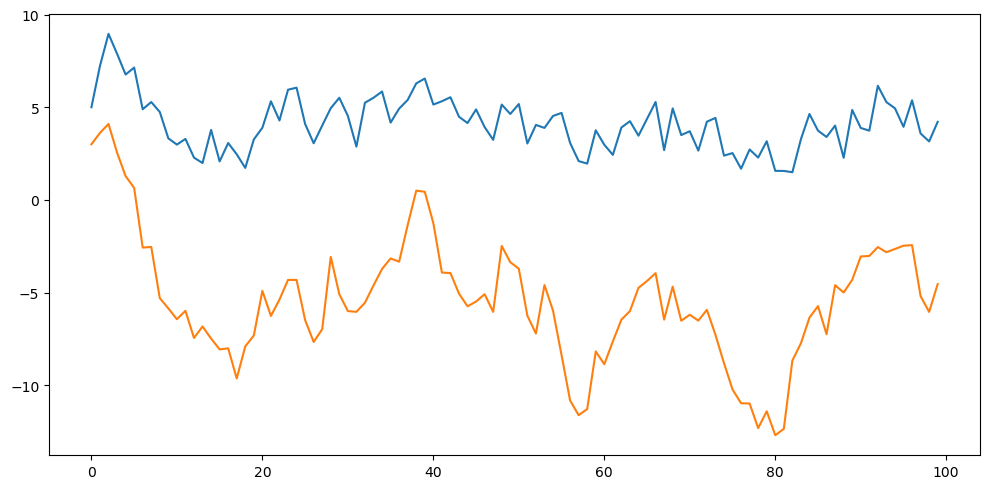

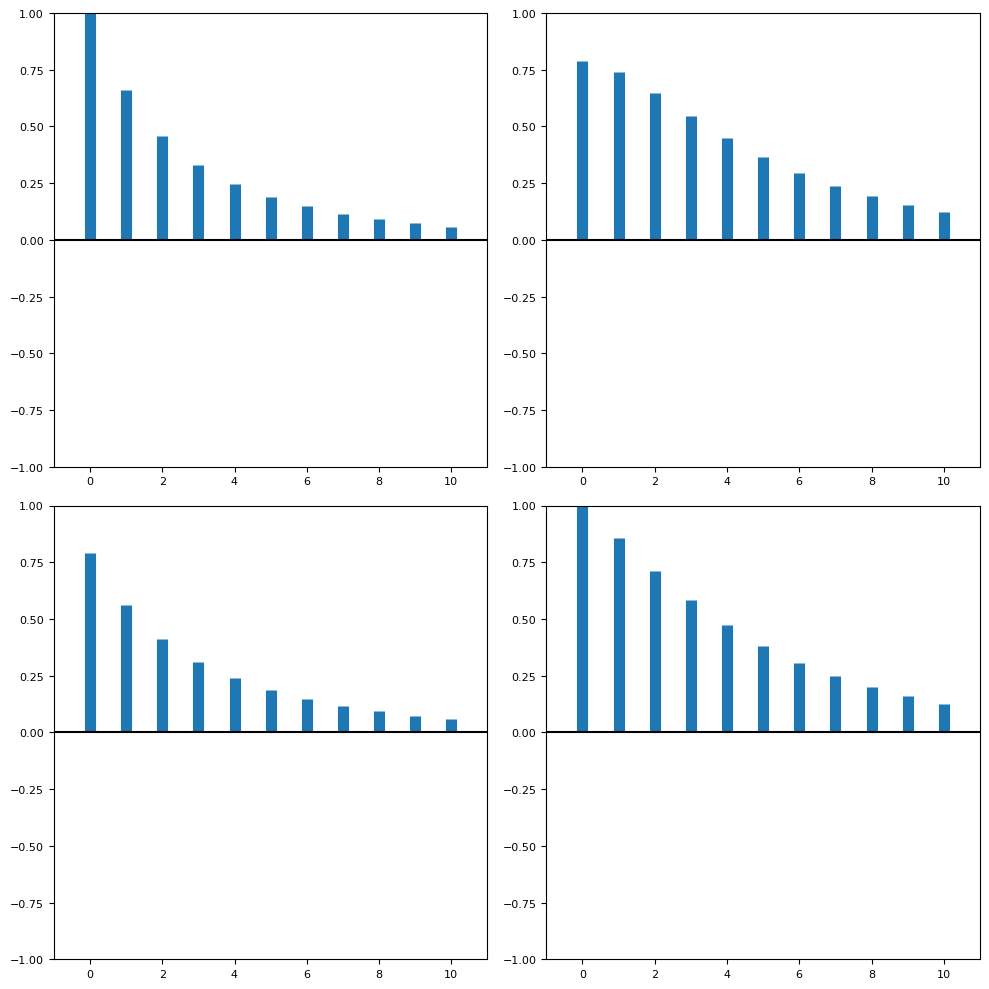

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

# 추정계수 입력
intercept = np.array([5, 3])
matrix_A = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
residual_covariance = np.array([[1, 0.8],[0.8, 2]])

# VAR 데이터 생성
model_var = VARProcess(matrix_A, intercept, residual_covariance)
## 데이터 시각화
simul_num = 100
simul_values = varsim(model_var.coefs, model_var.intercept, model_var.sigma_u, steps=simul_num)
plt.figure(figsize=(10,5))
plt.plot(simul_values)
plt.tight_layout()
plt.show()
## ACF 시각화
model_var.plot_acorr()
plt.tight_layout()
plt.show()

$$
\begin{align*}
\text{Estimation of VAR(1)} && \\
&& \begin{bmatrix} Y_{1t} \\ Y_{2t} \end{bmatrix} &\rightarrow \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} + \begin{bmatrix} \phi_{11} \phi_{12} \\ \phi_{21} \phi_{22} \end{bmatrix} \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \end{bmatrix} + \begin{bmatrix} e_{1t} \\ e_{2t} \end{bmatrix} \sim N(0, \sum_{\epsilon_{[t]}}) \\
\end{align*}
$$

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Apr, 2024
Time:                     00:31:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.325247
Nobs:                     99.0000    HQIC:                  0.231603
Log likelihood:          -283.264    FPE:                    1.18294
AIC:                     0.167967    Det(Omega_mle):         1.11438
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         6.149595         0.703883            8.737           0.000
L1.y1        -0.027713         0.112236           -0.247           0.805
L1.y2         0.353225         0.048446            7.291           0.000

Results for equation 

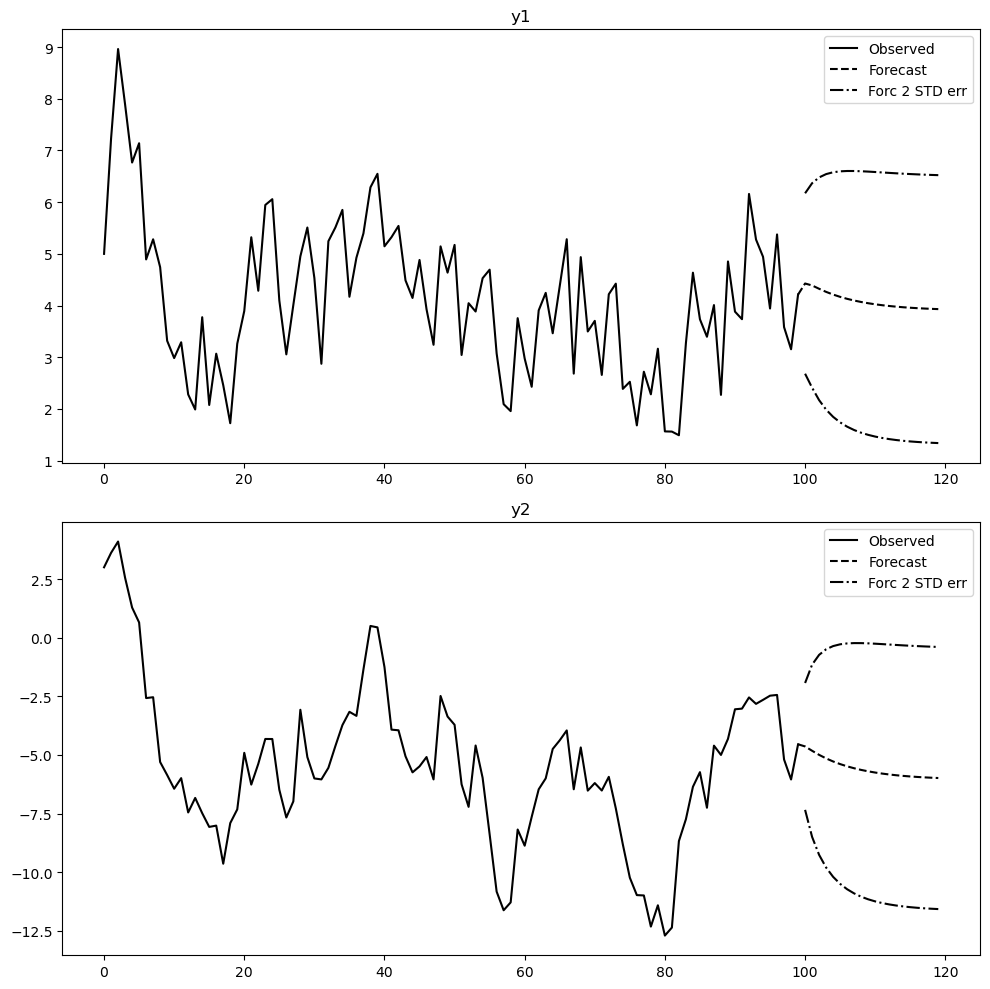

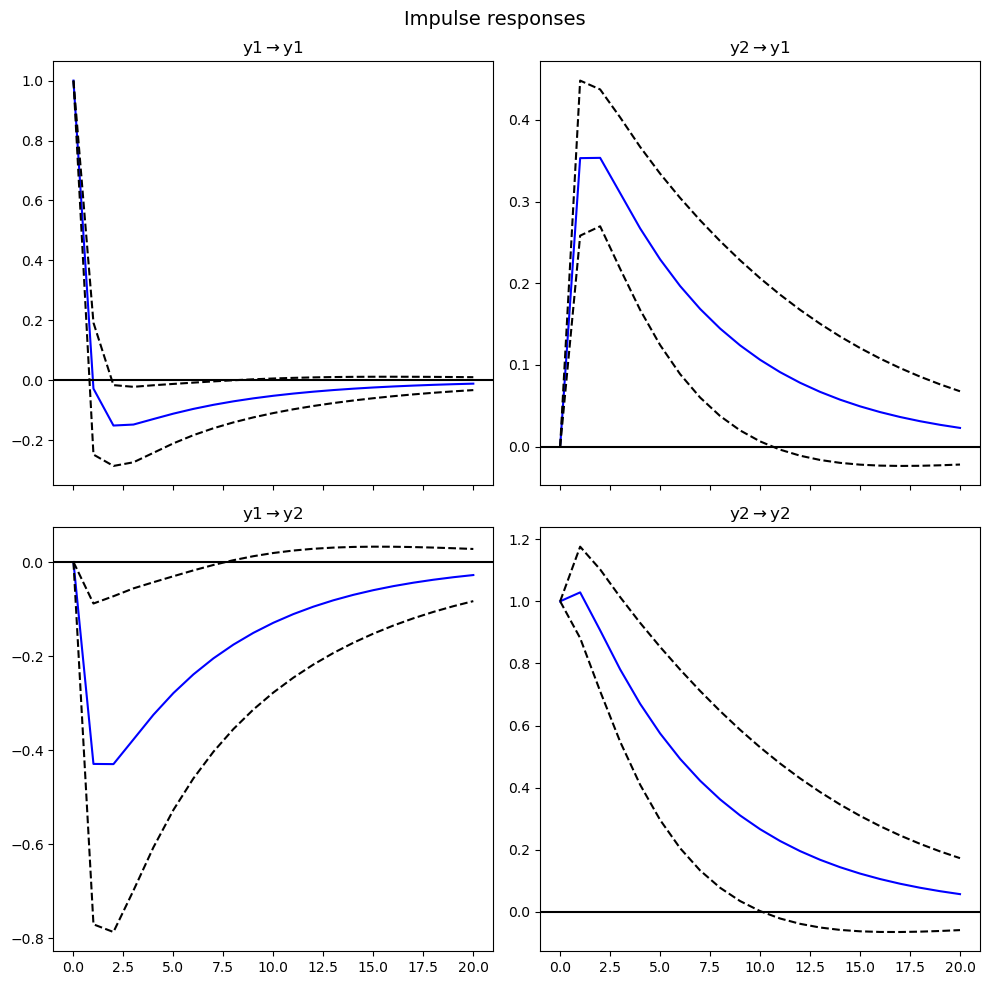

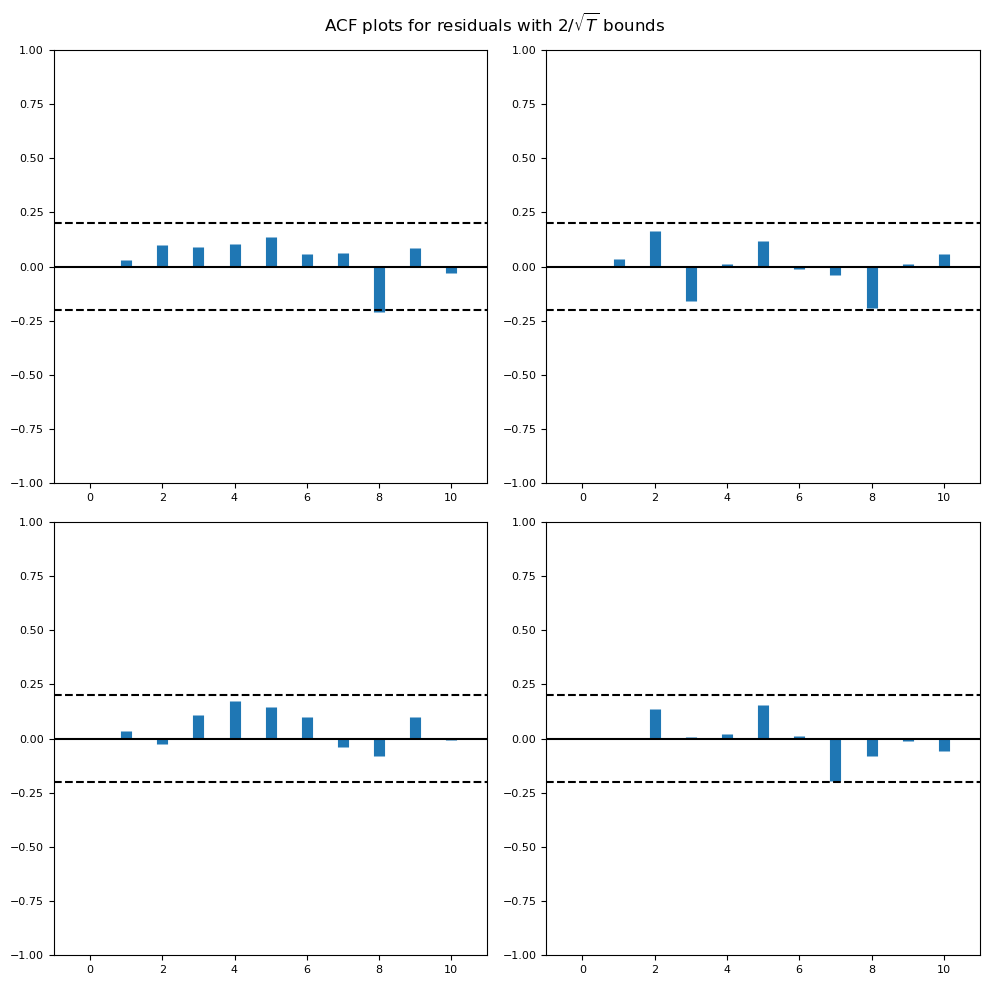

In [4]:
# VAR 모형적합
model_var = VAR(simul_values).fit()
display(model_var.summary())

# 예측 및 시각화
## 미래 예측시 오늘(t-1) 초기값이 있어야 내일(t) 값 예측이 가능하기 때문
forecast_num = 20
Y_pred = model_var.forecast(model_var.model.endog[-1:], steps=forecast_num)
Y_pred_ci = model_var.forecast_interval(model_var.model.endog[-1:], steps=forecast_num)
model_var.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 임펄스반응함수 추정
model_var.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
model_var.plot_acorr()
plt.tight_layout()
plt.show()

## **VAR모델링 실습:** 거시경제 데이터

- **데이터설명:** [링크](http://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html)

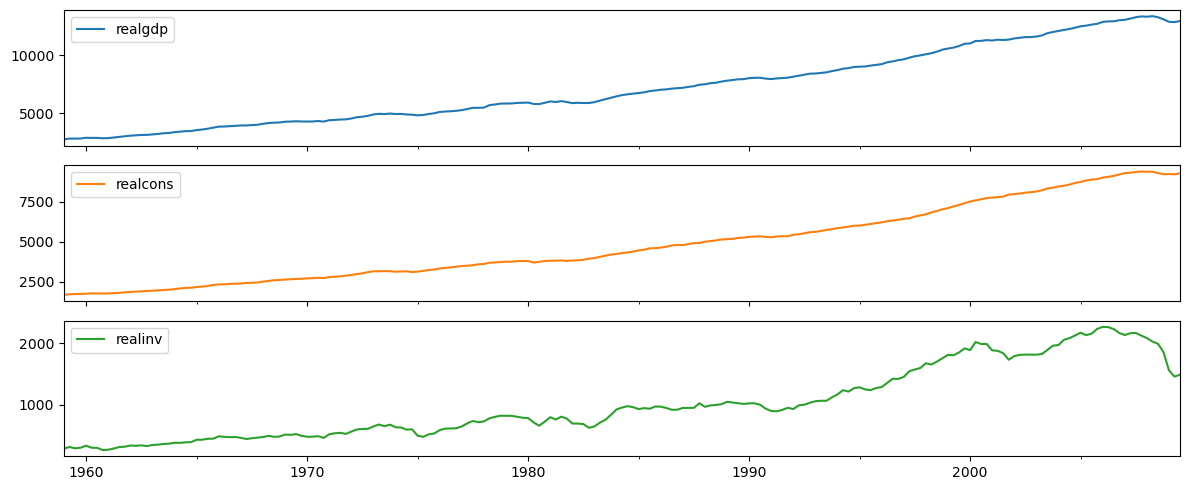

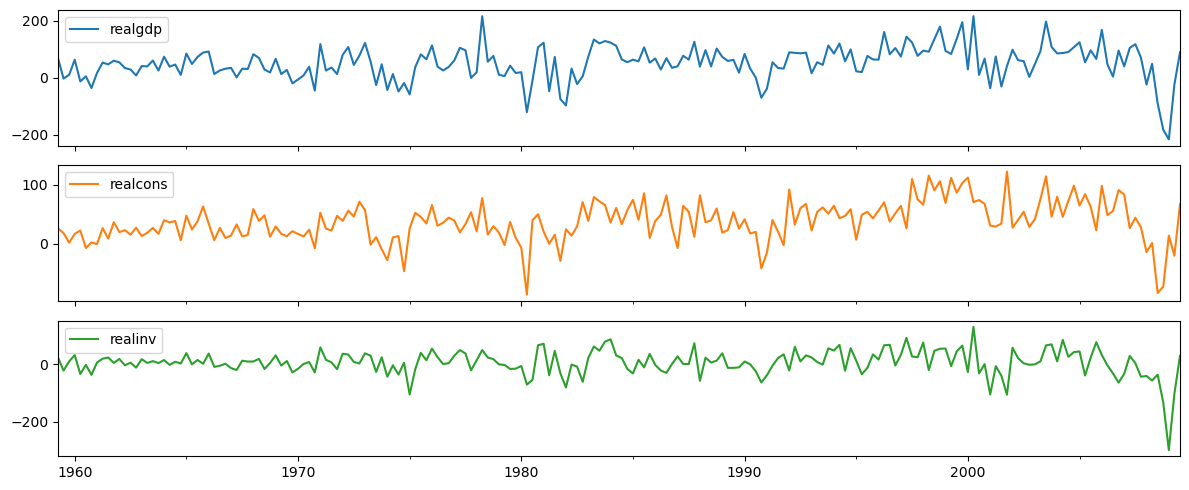

In [5]:
# 데이터 로딩
df = sm.datasets.macrodata.load_pandas().data
dates_info = df[['year', 'quarter']].astype(int).astype(str)
df.index = pd.DatetimeIndex(sm.tsa.datetools.dates_from_str(dates_info['year'] + 'Q' + dates_info['quarter']))
df_use = df.iloc[:,2:5]

# 데이터 시각화
df_use.plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

df_use.diff(1).dropna().plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

In [6]:
# VAR 모형적합
## 정상성 변환
df_use_return = df_use.diff(1).dropna()
## 최적 order 추정
model_var = VAR(df_use_return)
order_analysis = model_var.select_order(maxlags=5)
display(order_analysis.summary())
## VAR 추정
model_var = VAR(df_use_return).fit(maxlags=order_analysis.selected_orders['aic'])
display(model_var.summary())

,AIC,BIC,FPE,HQIC
0,20.92,20.97,1.217e+09,20.94
1,20.27,20.47*,6.366e+08,20.35
2,20.25,20.60,6.220e+08,20.39
3,20.13*,20.63,5.528e+08*,20.33*
4,20.17,20.82,5.754e+08,20.43
5,20.19,20.99,5.865e+08,20.51


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Apr, 2024
Time:                     00:31:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.6099
Nobs:                     199.000    HQIC:                   20.3144
Log likelihood:          -2818.40    FPE:                5.43599e+08
AIC:                      20.1135    Det(Omega_mle):     4.69244e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              12.638159         7.157543            1.766           0.077
L1.realgdp         -0.393119         0.151899           -2.588           0.010
L1.realcons         1.173272         0.192878            6.083    

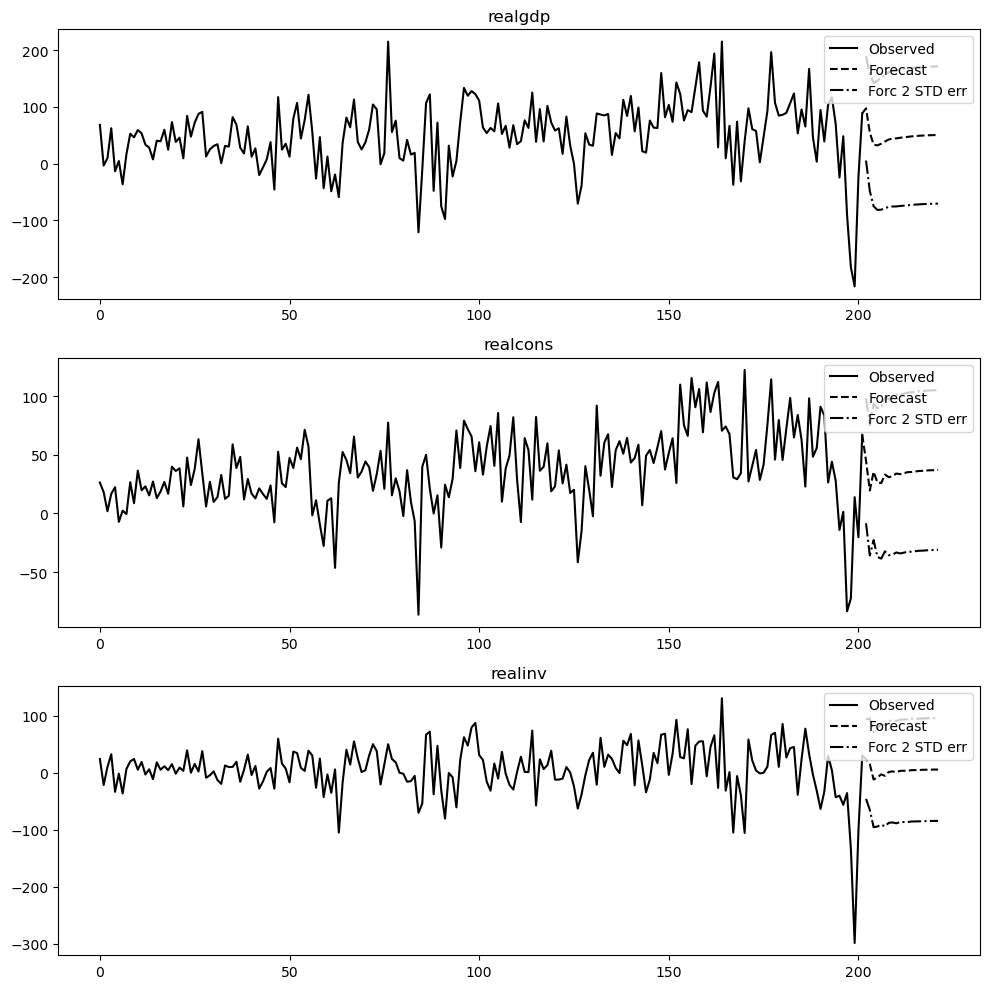

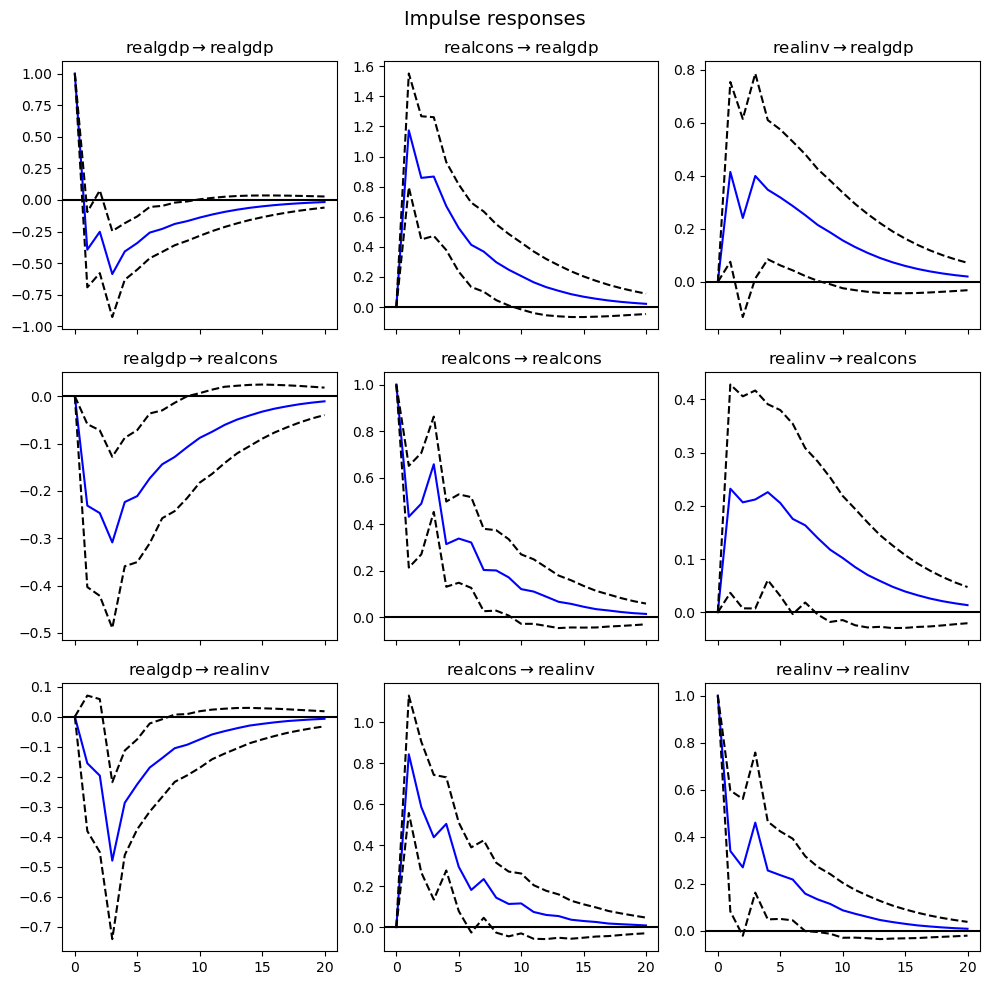

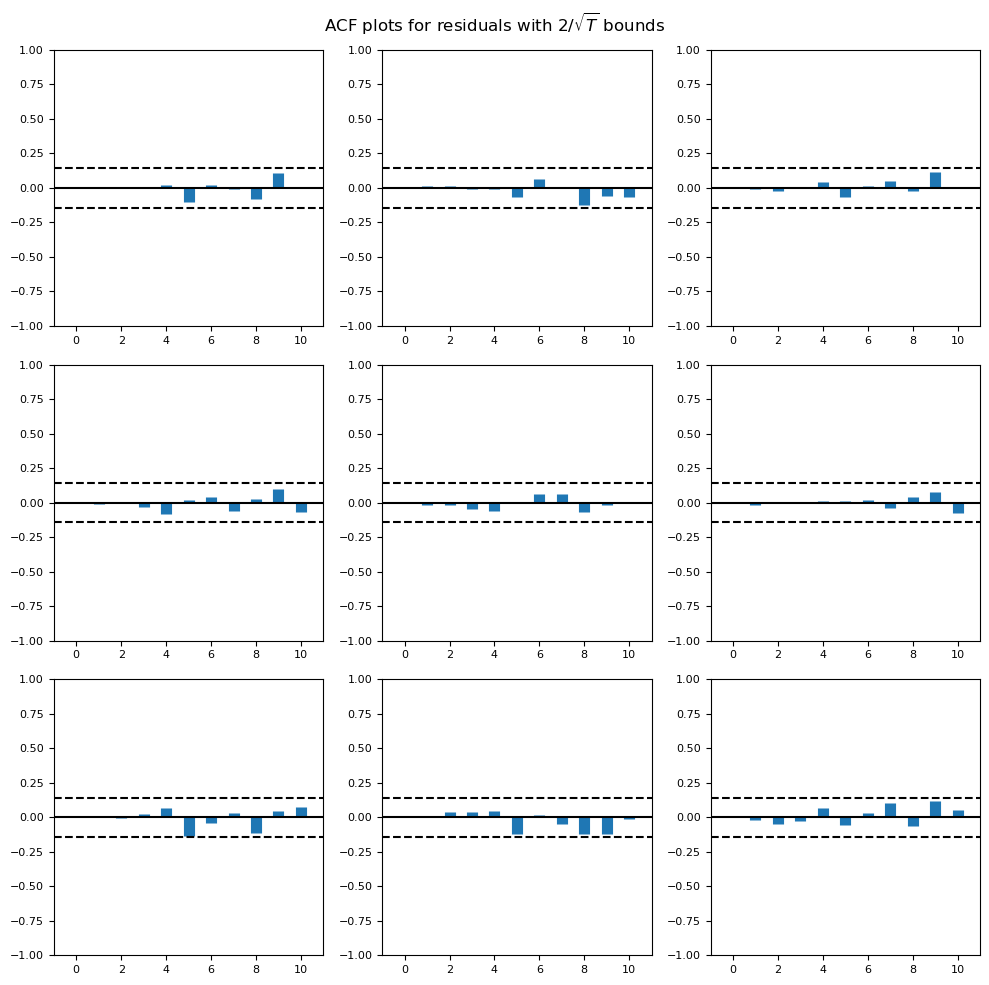

In [7]:
# 예측 및 시각화
forecast_num = 20
model_var.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 임펄스반응함수 추정
model_var.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
model_var.plot_acorr()
plt.tight_layout()
plt.show()

# **그래인저 인과관계 알고리즘(Granger Causality)**

## 인과관계? 상관관계?

**1) 허구적 회귀(Spurious Regression):**

> **"$X$와 $Y$가 관련(인과관계)이 없거나 논리적인 스토리가 없음에도 `단순하게 상관성이 높다라는 공격`"**
>
> - `지나치게 데이터에 집착할 필요 없고`, 데이터분석은 정말 어려운 작업  
>
> <center><img src='Image/Expert/Correlation_Causation_explained.jpg' width='500'></center>
>
> - `시간관계를 마치 인과관계 인것처럼` 해석하는 오류
>
> <center><img src='Image/Expert/Correlation_Causation_OMG.jpg' width='500'></center>

---

**2) [Post Hoc Fallacy:](https://en.wikipedia.org/wiki/Post_hoc_ergo_propter_hoc)**

> **"$X$ 다음에 $Y$가 일어났으므로 $X$가 $Y$의 원인이라는, 마치 `시간순서가 인과관계를 담보할 것이라는 오류`"**
>
> - **징크스:** 머리를 염색했더니 시험점수가 100점이 나오더라?    
> - **오버피팅(Overfitting):** 과거가 미래에 인과관계가 있을거라 생각해서 Train 데이터에 유독 치우쳐 학습된 모델
> - **Post Hoc Fallacy:** 아무런 인과관계가 없는(상관관계는 높더라도) 데이터로 모델을 만들고 해석하는 것 
>
> $\rightarrow$ 인과관계가 있더라도 `데이터분석에서는 상관관계만 추정할 뿐 인과관계 해석은 조심`해야!

## Granger Causality 이해

> **"[어떤 현상의 예측에 있어 `다른 시간순서 정보를 이용하는 것`이 얼마나 `유의미한지` 확인하는 방법론](https://en.wikipedia.org/wiki/Granger_causality)"**
>
> |  | **방향** | **예시** |
|:---:|:---:|:---|
| **추론불가한 문제** | `인과관계` | - 닭과 달걀의 생산량의 인과관계 <br> - 단기금리와 중기금리와의 인과관계 <br> - 강수량과 동물원방문객수의 인과관계 <br> - 급여인상액과 소비금액의 인과관계 <br> - 어떤 회사의 광고비지출액와 매출액의 인과관계 <br> - 강수량과 인터넷사용량의 인과관계 <br> - 어떤 광고캠페인의 수치형 설정조건과 클릭수와 인과관계 |
| **추론가능한 문제** | `Granger 인과관계` | - 닭과 달걀의 생성순서 별 서로의 영향력은 어떤가? |
>
> - **필요성:** 분석에서 `독립변수와 종속변수`는 이론에 의해 `이미 결정된 것으로 간주`하고 인과관계 확인하는 섣부름이 있으며, 현실적으로 `원인과 결과가 불분명한 경우`에 대한 명확한 결정은 `어렵`지만, `시간적 선후관계나 시간적 인과성`은 제시할 수 있지 않을까?
    
---

**1) 모형의 전재:** 

> - **시간선후:** `과거 사건은 현재 사건을 유발`할 수 있지만 `미래 사건은 현재 사건을 유발할 수 없음`  
> - 독립변수($X$)와 종속변수($Y$)는 `모두 정상성 데이터`여야 하며 비정상인 경우 오해석 여지가 많음
> - 입력변수로 시차(Lagged) 적용된 `지연값 변수`를 사용하며, `예상되는 시차까지의 모든 지연시차를 고려`해야 함 ($P$이라면, $t=1, 2, ..., P$의 모든 시차 사용)

---

**2) 추정 방향:** 독립변수와 종속변수의 `양방향 비교`가 필요하기에 `총2회의 검정을 수행`

> **(1) $X \implies Y$:** $X$가 $Y$에 인과영향을 주는지 테스트
>
> \begin{align*}
\text{Just use Y} && Y_{t} &= \mu_t + \displaystyle \sum_{i=1}^{\infty} \alpha_i Y_{t-i} + \epsilon_{Y} \\
\text{Use X and Y} && Y_{t} &= \mu_t + \displaystyle \sum_{i=1}^{\infty} \alpha_i Y_{t-i} + \displaystyle \sum_{j=1}^{\infty} \beta_j X_{t-j} + \epsilon_{XY} \\
\end{align*}
> - $\beta_j$ `추정 계수가 유의`하고(p-value < 유의수준) `0이 아니면` $X$가 $Y$에 `인과영향`
>
>
> **(2) $Y \implies X$:** $Y$가 $X$에 인과영향을 주는지 테스트
>
> \begin{align*}
\text{Just use X} && X_{t} &= \mu_t + \displaystyle \sum_{i=1}^{\infty} \alpha_i X_{t-i} + \epsilon_{X} \\
\text{Use X and Y} && X_{t} &= \mu_t + \displaystyle \sum_{i=1}^{\infty} \alpha_i X_{t-i} + \displaystyle \sum_{j=1}^{\infty} \beta_j Y_{t-j} + \epsilon_{YX} \\
\end{align*}
> - $\beta_j$ `추정 계수가 유의`하고(p-value < 유의수준) `0이 아니면` $Y$가 $X$에 `인과영향`
    
---

**3) 의사결정:** 

> **(1) $(X \Rightarrow Y)$ & $(Y \nRightarrow X)$:** $X$가 $Y$의 `Granger 인과요인 확정`
>
> **(2) $(X \nRightarrow Y)$ & $(Y \Rightarrow X)$:** $Y$가 $X$의 `Granger 인과요인 확정`
>
> **(3) $(X \Rightarrow Y)$ & $(Y \Rightarrow X)$:**
>
> - `p-value`가 더 작은 케이스로 해석
> - `추가적 외부변수(Exogenous Variable)`를 탐색하거나 `다른 시차 시도`
>
> **(4) $(X \nRightarrow Y)$ & $(Y \nRightarrow X)$:**
>
> - 두 변수가 서로 Granger 인과영향을 주지 않는다고 볼 수도 있지만 `단언하긴 어려움`
> - `추가적 외부변수(Exogenous Variable)`를 탐색
> - 입력시차에 따라 달라질 수 있으므로 `다른 시차 시도`  

---

**4) 주의사항:**  

> - 무조건적 인과관계를 단정할 순 없고, `Granger 인과관계`만 해석 가능
> - 시간 선후가 명확한 맥락을 보이는 시계열 데이터에 적용 가능
> - 상관관계 대신 `시간적 인과성`을 확인 할 수 있지만, `보이지 않는 요소들도 고려되어야` 확실함


## **Granger Causality모델링 실습:** 닭과 달걀의 생산량 Granger 인과관계

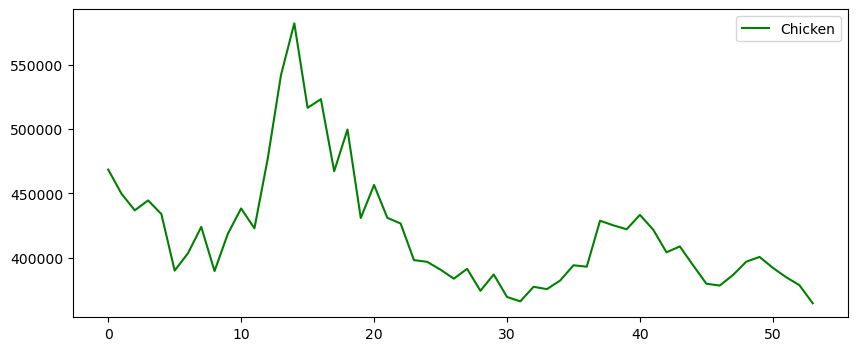

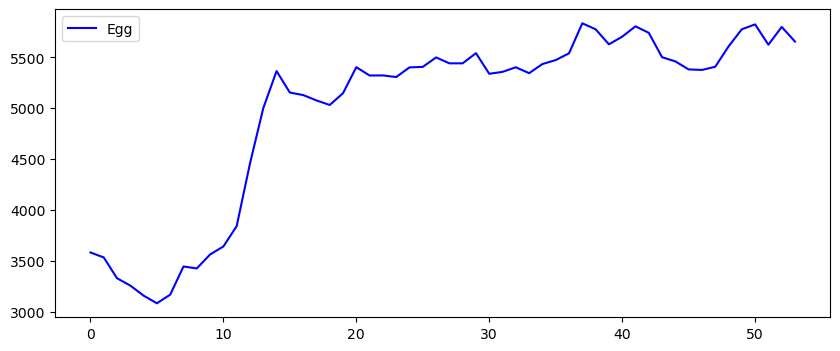

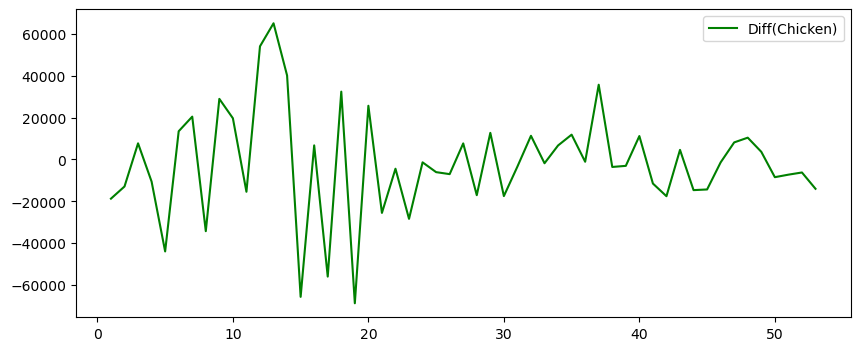

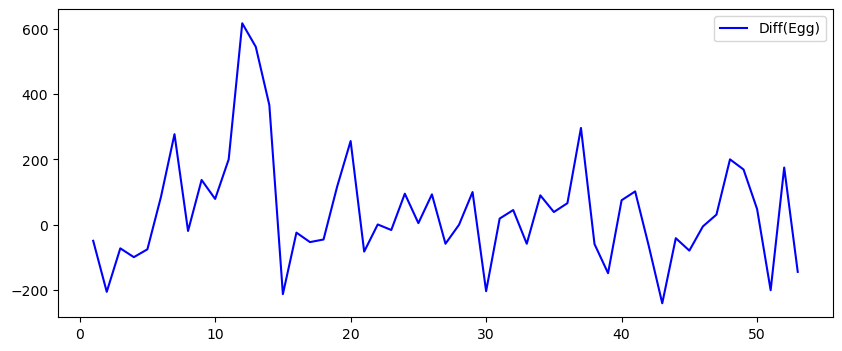

In [8]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'ChickenEggProduction', 'Chicken_Egg_Production.txt')
df_all = pd.read_csv(location, sep='\t')

# 데이터 시각화
plt.figure(figsize=(10,4))
plt.plot(df_all['Chicken'], 'g', label='Chicken')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df_all['Egg'], 'b', label='Egg')
plt.legend()
plt.show()

# 정상성 변환 시각화
plt.figure(figsize=(10,4))
plt.plot(df_all['Chicken'].diff(1), 'g', label='Diff(Chicken)')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df_all['Egg'].diff(1), 'b', label='Diff(Egg)')
plt.legend()
plt.show()

In [9]:
# 입력 형태는 array기 때문에 values
# 입력 변수 순서로 Y1, Y2를 지정하기 때문에 순서에 유의
# maxlag는 VAR의 파라미터 수
# verbose는 결과 출력 여부
display(df_all.iloc[:,1:].head())
print(grangercausalitytests.__doc__[:720])

# Granger Causality 테스트
print('\n[Egg -> Chicken]')
granger_result1 = grangercausalitytests(df_all.diff(1).dropna().iloc[:,1:].values, 
                                        maxlag=3, verbose=True)
print('\n[Chicken -> Egg]')
granger_result2 = grangercausalitytests(df_all.diff(1).dropna().iloc[:,[2,1]].values, 
                                        maxlag=3, verbose=True)

,Chicken,Egg
0,468491,3581
1,449743,3532
2,436815,3327
3,444523,3255
4,433937,3156



    Four tests for granger non causality of 2 time series.

    All four tests give similar results. `params_ftest` and `ssr_ftest` are
    equivalent based on F test which is identical to lmtest:grangertest in R.

    Parameters
    ----------
    x : array_like
        The data for testing whether the time series in the second column Granger
        causes the time series in the first column. Missing values are not
        supported.
    maxlag : {int, Iterable[int]}
        If an integer, computes the test for all lags up to maxlag. If an
        iterable, computes the tests only for the lags in maxlag.
    addconst : bool
        Include a constant in the model.
    verbose : bool
        Print results. De

[Egg -> Chicken]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=11.0043 , p=0.0009  , df=1
likelihood ratio test: chi2=9.9819  , p=0.0016  , df=1
parameter F test:         F=10.36

In [10]:
# 의사결정
# 닭이 과거/현재 달걀을 낳으면 그 수는 약 3년후 현재/미래 닭의 수에 영향을 준다
# 닭의 수가 과거/현재부터 많아진다고해서 현재/미래의 달걀의 수가 늘어나진 않는다
# 달걀 -> 닭 (Granger Causality!)

## **Granger Causality모델링 실습:** 삼성전자와 삼성전자 우선주 Granger 인과관계

In [11]:
!pip install -U finance-datareader

  Obtaining dependency information for finance-datareader from https://files.pythonhosted.org/packages/e3/15/724a966c42658a7640813f94650d2f18e24e78ac353765762da82b86fb96/finance_datareader-0.9.90-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/46.6 kB ? eta -:--:--
   ---------------------------------------- 46.6/46.6 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: finance-datareader
    Found existing installation: finance-datareader 0.9.50
    Uninstalling finance-datareader-0.9.50:
      Successfully uninstalled finance-datareader-0.9.50


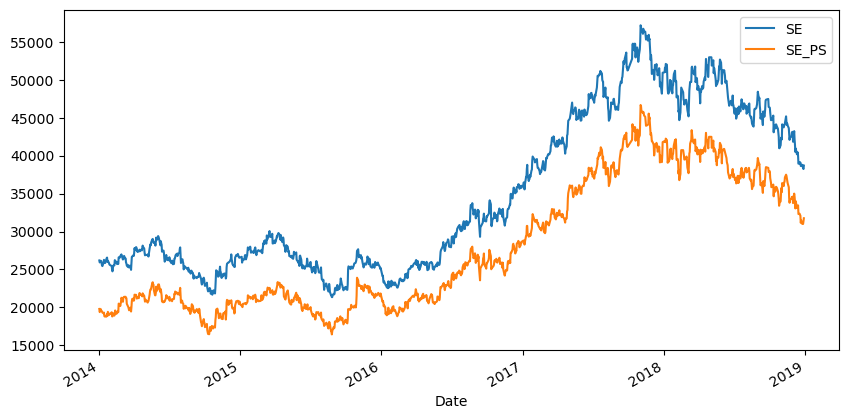

In [12]:
# 데이터 로딩
import FinanceDataReader as fdr 
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 12, 31)
df1 = fdr.DataReader(symbol='005930', start=start, end=end)
df2 = fdr.DataReader(symbol='005935', start=start, end=end)

# 데이터 시각화
df = pd.concat([df1.Close, df2.Close], axis=1).dropna()
df.columns = ["SE", "SE_PS"]
df.plot(figsize=(10,5))
plt.show()

In [13]:
# 비정상성 차수 추론
target = df.SE.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y1_integ_order = 0
if integ_result[1] > 0.1:
    Y1_integ_order = Y1_integ_order + 1
target = df.SE_PS.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] > 0.1:
    Y2_integ_order = Y2_integ_order + 1
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order)

# Granger Causality 테스트
print('\n[삼성전자우 -> 삼성전자]')
granger_result1 = grangercausalitytests(df.diff(Y1_integ_order).dropna().values, 
                                        maxlag=4, verbose=True)
print('\n[삼성전자 -> 삼성전자우]')
granger_result2 = grangercausalitytests(df.diff(Y2_integ_order).dropna().iloc[:,[1,0]].values, 
                                        maxlag=4, verbose=True)

Y1_order:  1 Y2_order:  1

[삼성전자우 -> 삼성전자]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7615  , p=0.0968  , df_denom=1221, df_num=1
ssr based chi2 test:   chi2=2.7683  , p=0.0962  , df=1
likelihood ratio test: chi2=2.7651  , p=0.0963  , df=1
parameter F test:         F=2.7615  , p=0.0968  , df_denom=1221, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2443  , p=0.0146  , df_denom=1218, df_num=2
ssr based chi2 test:   chi2=8.5235  , p=0.0141  , df=2
likelihood ratio test: chi2=8.4939  , p=0.0143  , df=2
parameter F test:         F=4.2443  , p=0.0146  , df_denom=1218, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2934  , p=0.0199  , df_denom=1215, df_num=3
ssr based chi2 test:   chi2=9.9372  , p=0.0191  , df=3
likelihood ratio test: chi2=9.8971  , p=0.0195  , df=3
parameter F test:         F=3.2934  , p=0.0199  , df_denom=1215, df_num=3

Granger Causality
number of lags (no zero) 4

In [14]:
# 의사결정
# 삼성전자 우선주는 과거 4거래일까지 삼성전자 가격에 영향을 준다
# 삼성전자는 과거 2거래일까지 삼성전자 우선주 가격에 영향을 준다
# 삼성전자 우선주 -> 삼성전자 (Granger Causality!)

# **공적분 알고리즘(Cointegration)**

> **"Granger Causality가 다소 거시적/학문적 큰 틀에서의 많이 사용된다면, `Cointegration은 실제 현실적인 거래에서의 (삼성전자 vs 삼성전자 우선주)처럼 관계성을 보는데 많이 사용`"**
>
> - `SARIMAX`에서 추세와 계설성을 `차분하는 Integrated 용어와 동일`
> - 2개 이상을 함께 분석하는 Correlation, Covariance 처럼 `2개 이상 변수의 공통된 특징을 함께 파악`하는 것이라서 `Co- 가 반영된 차분차수 분석` $\rightarrow$ 데이터가 `함께 움직일 때 Integration이 어떻게 되는지` 분석!

---

**1) 공적분 상태(Cointegration):** 

- 크기는 다를 수 있지만 `움직임 패턴이 유사한 데이터는 어떤 관련성`이 있을까?

> - `기존` 2개의 데이터는 추세가 존재하는 `비정상 시계열인데 Spread는 마치 정상성인것 같네?`

<center><img src='Image/Expert/TS_Cointegration2.png' width='500'>(https://www.econometrics-with-r.org/16.3-cointegration.html)</center>

- `함께 움직이는 듯한 데이터들의 Integration은` 어떤 관련성이 있을까?

<center><img src='Image/Expert/TS_Cointegration.png' width='700'>(https://letianzj.github.io/cointegration-pairs-trading.html)</center>

> - 두 시계열 각각 차분($d_1, d_2$)을 하여 정상성이 되는 비정상성 시계열에서
> - `선형조합(Linear Combination)`하여 생성된 시계열이 `낮은`(< $d_1 + d_2$) 적분차수에서 `정상성 시계열이 되는 경우`
> - 두 시계열은 서로 유사한 움직임을 보이는 `공적분 상태`에 있음

$$
\begin{align*}
\text{Each Integration Order} && Y_1 &\sim I(d_1) \\
&& Y_2 &\sim I(d_2) \\
\text{Cointegration Vector} && \alpha &= [\alpha_1, \alpha_2] \\
\text{where} && \alpha_1 Y_1 &+ \alpha_2 Y_2 \sim I(b). \\
\text{ if } && d_1 = 1 & \text{ and } d_2 = 1, \text{ then } b = ??
\end{align*}
$$

> - **공적분 벡터(Cointegration Vector):** `공적분 상태`를 생성하는 `선형조합 계수/가중치/행렬`
>
> $\rightarrow$ 두 비정상 시계열의 `선형조합(Linear Combination)으로 생성된 시계열의 적분차수(Integration)가 기존 차수의 합보다 낮아지거나 또는 정상상태 시계열`이 되는것

---

**2) 공적분 상태 시계열 특징:**

> - `서로 상관관계가 없음`에도 불구하고 `장기적으로 같은 방향`으로 움직임 (ex. 삼성전자 & 삼성전자 우선주)
> - 서로 상관성 없는 술취한 사람과 개가 마치 끈에 묶여서 서로 너무 멀어지지는 않는 상황과 유사
> - 유사 군집화(Clustering)를 통한 `페어 트레이딩(Pair Trading)`, `통계적 차익거래(Statistical Arbitrage) 등의 트레이딩 전략`에 응용 가능

---

**3) 공적분 추정 알고리즘:** `VECM`

> **Engle-Granger's Representation Theorem (Vector Error Correction Model)**
>
> \begin{align*}
\text{$Y_{1t} \sim I(1)$, $Y_{2t} \sim I(1)$ 공적분}
& \iff \Delta Y_{2t} = \gamma_1 z_{t-1}  + \sum_{i=1}^K \psi_{1,i} \Delta Y_{1t-i} + \sum_{i=1}^L \psi_{2,i} \Delta Y_{2t-i} + e_{t} \\
& \text{($z_t$는 $Y_{2t}$를 종속변수로 $Y_{1t}$를 독립변수로 회귀분석하여 만들어진 잔차)} \\
\end{align*}
>
> **(1)** 종속변수 $Y_{2t}$에 $Y_{1t}$를 독립변수로 회귀분석 한 `잔차` $z_t$가 `정상성 시계열인지를 통계량으로 확인`($H_0: $ No Cointegration)   
>
> **(2)** 변환된 변수들의 $VECM$ 회귀 분석의 `잔차` $e_t$가 `정상성 시계열인지를 통계량으로 확인`($H_0: $ No Cointegration) 

## **Cointegration 모델링 실습:** 예제 데이터기반 이해

---

$$
\begin{align*}
Y1 \text{: Random Walk with I(1)} && Y_{1t} &= Y_{1t-1} + e_{1t} \\
Y2 \text{: Random Walk with I(1)} && Y_{2t} &= 0.6 Y_{1t} + e_{2t} \\
&& &= 0.6 (Y_{1t-1} + e_{1t}) + e_{2t} \\
Y_{LC}\text{: Stationary Time Series with I(0)} && Y_{LC} &= 0.6 Y_{1t} - Y_{2t} \\
&& &= 0.6 (Y_{1t-1} + e_{1t}) - (0.6 (Y_{1t-1} + e_{1t}) + e_{2t}) \\
&& &= 0.6Y_{1t-1} + 0.6e_{1t} - 0.6Y_{1t-1} - 0.6e_{1t} - e_{2t} \\
&& &= - e_{2t} \\
\end{align*}
$$

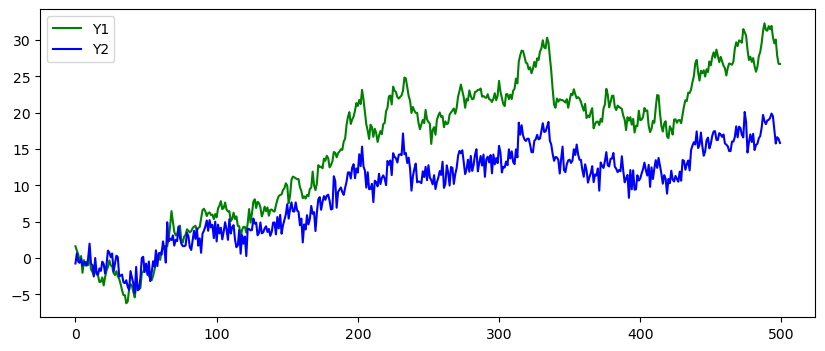

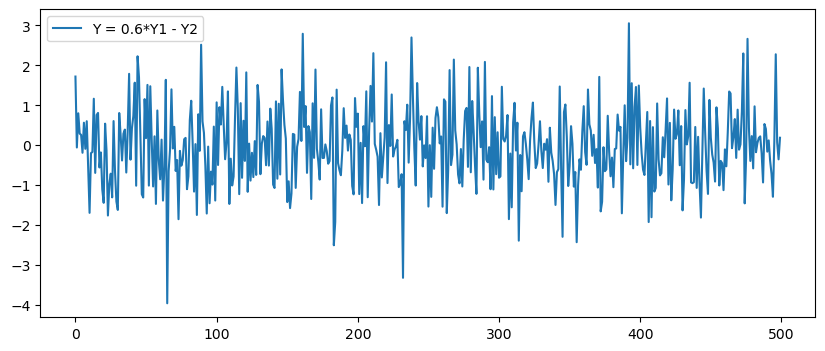

,output
statistics,-22.68
p-value,0.00


In [15]:
# 데이터 생성
np.random.seed(1)
Y1 = np.random.randn(500).cumsum()
Y2 = 0.6 * Y1 + np.random.randn(500)
Y = 0.6 * Y1 - Y2

# 시각화
plt.figure(figsize=(10,4))
plt.plot(Y1, 'g', label='Y1')
plt.plot(Y2, 'b', label='Y2')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(Y, label='Y = 0.6*Y1 - Y2')
plt.legend()
plt.show()

# VECM 공적분 확인
coint_result = coint(Y1, Y2)
pd.DataFrame([coint_result[0], coint_result[1]], 
             index=['statistics', 'p-value'], columns=['output'])

## **Cointegration 모델링 실습:** 주가 군집화 Pair Trading

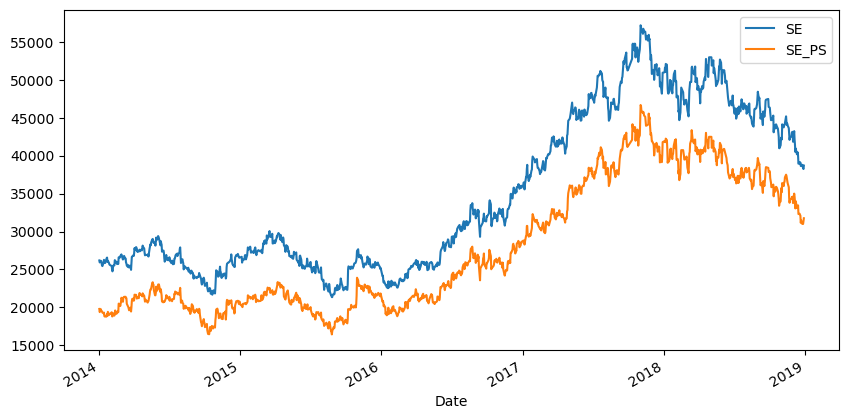

Y1_order:  1 Y2_order:  1


In [16]:
# 데이터 로딩
import FinanceDataReader as fdr 
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 12, 31)
df1 = fdr.DataReader(symbol='005930', start=start, end=end)
df2 = fdr.DataReader(symbol='005935', start=start, end=end)

# 데이터 시각화
df = pd.concat([df1.Close, df2.Close], axis=1).dropna()
df.columns = ["SE", "SE_PS"]
df.plot(figsize=(10,5))
plt.show()

# 비정상성 차수 추론
target = df.SE.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y1_integ_order = 0
if integ_result[1] > 0.1:
    Y1_integ_order = Y1_integ_order + 1
target = df.SE_PS.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] > 0.1:
    Y2_integ_order = Y2_integ_order + 1
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SE   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.312e+05
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:31:58   Log-Likelihood:                -10206.
No. Observations:                1226   AIC:                         2.042e+04
Df Residuals:                    1224   BIC:                         2.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        909.0492     97.603      9.314      0.000     717.562    1100.536
SE_PS          1.2149      0.003    362.218      0.000       1.208       1.221
==============================================================================
Omnibus:                       11.593   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.798
Skew:                          -0.188   Prob(JB):                      0.00452
Kurtosis:                       2.734   Cond. No.                     9.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

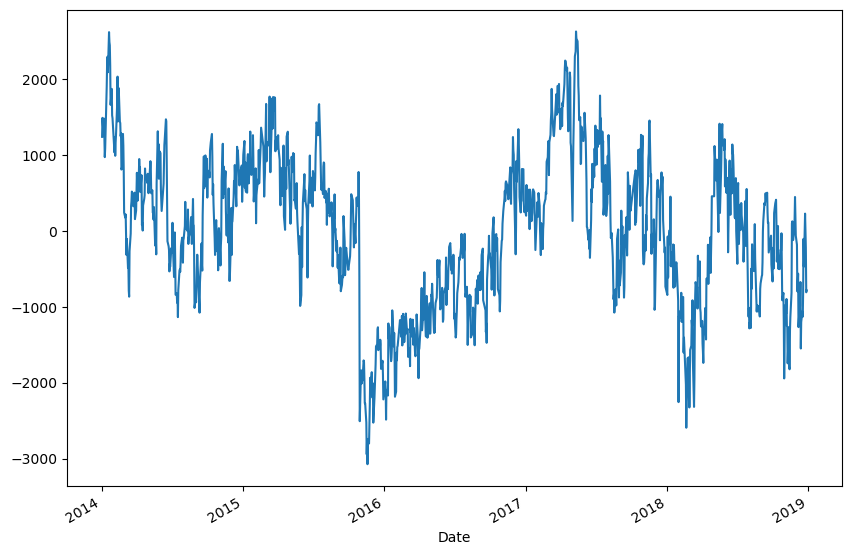

Test Statistics        -3.52
p-value                 0.01
Used Lag               16.00
Used Observations   1,209.00
dtype: float64

In [17]:
# 회귀분석 적합
## 모델링
Y = df.SE
X = df.SE_PS
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
display(model.summary())

# 공적분 시계열 시각화
# df.SE = model.params[0] + model.params[1]*df.SE_PS
# residual = df.SE - model.params[0] - model.params[1]*df.SE_PS
Y_integ = df.SE - model.params[0] - model.params[1]*df.SE_PS
plt.figure(figsize=(10,7))
Y_integ.plot()
plt.show()

# 공적분 시계열 비정상성 테스트
display(pd.Series(sm.tsa.stattools.adfuller(Y_integ)[0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

In [18]:
# VECM 공적분 테스트
coint_result = coint(df.SE, df.SE_PS)
pd.DataFrame([coint_result[0], coint_result[1]], index=['statistics', 'p-value'], columns=['output'])

,output
statistics,-3.52
p-value,0.03


<center><img src='Image/Expert/PairTrading_Example1.webp' width='900'>(https://tradingstrategyguides.com/pairs-trading/)</center>

- **Pair Trading:**

> - `두 자산(Pair)의 가격괴리 변화를 이용`하는 전략으로, `두 자산의 가격 움직임이 유사할 것이라는 기대`에서 실제 가격차이인 스프레드(Spread)를 이용하여 `상대적으로 가치 높은 자산은 공매도`를 하고 `가치 낮은 자산은 매수`하여 평균에 도달하면 거래를 청산 
>
> - 시장의 방향성에 의존하지 않고 정량적인 요소를 바탕으로 `통계적인 계산을 통해 거래를 하기 때문에 시장중립적인 전략`